# UN Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv("/Users/bentonwang/My_Documents/NSS_DS8_Projects/un-exploration-MultidisciplinaryDeepDives/data/gdp_per_capita.csv")

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes,Value Footnotes.1
0,Afghanistan,2021,1673.964059,NaN,NaN
1,Afghanistan,2020,2078.595086,NaN,NaN
2,Afghanistan,2019,2168.133765,NaN,NaN
3,Afghanistan,2018,2110.239384,NaN,NaN
4,Afghanistan,2017,2096.093111,NaN,NaN
5,Afghanistan,2016,2023.834656,NaN,NaN
6,Afghanistan,2015,2128.125938,NaN,NaN
7,Afghanistan,2014,2110.829568,NaN,NaN
8,Afghanistan,2013,2062.059176,NaN,NaN
9,Afghanistan,2012,1958.447627,NaN,NaN


In [4]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes,Value Footnotes.1
7718,Zimbabwe,1999,2279.549784,NaN,NaN
7719,Zimbabwe,1998,2299.395445,NaN,NaN
7720,Zimbabwe,1997,2246.209391,NaN,NaN
7721,Zimbabwe,1996,2185.928529,NaN,NaN
7722,Zimbabwe,1995,1977.675574,NaN,NaN
7723,Zimbabwe,1994,1958.125362,NaN,NaN
7724,Zimbabwe,1993,1765.451299,NaN,NaN
7725,Zimbabwe,1992,1731.232787,NaN,NaN
7726,Zimbabwe,1991,1907.652489,NaN,NaN
7727,Zimbabwe,1990,1794.153646,NaN,NaN


In [5]:
gdp_df = gdp_df.drop(['Value Footnotes', 'Value Footnotes.1'], axis=1)

In [6]:
gdp_df = gdp_df.rename(columns = {"Country or Area": "Country", "Value": "GDP_Per_Capita"})

In [7]:
gdp_df.shape

(7728, 3)

In [8]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1673.964059
1,Afghanistan,2020,2078.595086
2,Afghanistan,2019,2168.133765
3,Afghanistan,2018,2110.239384
4,Afghanistan,2017,2096.093111
...,...,...,...
7723,Zimbabwe,1994,1958.125362
7724,Zimbabwe,1993,1765.451299
7725,Zimbabwe,1992,1731.232787
7726,Zimbabwe,1991,1907.652489


In [9]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [10]:
Year_series = gdp_df['Year'].squeeze()
Year_series

0       2021
1       2020
2       2019
3       2018
4       2017
        ... 
7723    1994
7724    1993
7725    1992
7726    1991
7727    1990
Name: Year, Length: 7728, dtype: int64

In [11]:
Year_array = pd.unique(pd.Series(Year_series))
Year_array 

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2022, 2001,
       2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990])

In [12]:
gdp_df.groupby("Year").size()

Year
1990    208
1991    210
1992    213
1993    214
1994    216
1995    226
1996    226
1997    227
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    239
2005    239
2006    240
2007    240
2008    242
2009    243
2010    243
2011    244
2012    242
2013    244
2014    243
2015    243
2016    242
2017    242
2018    242
2019    242
2020    241
2021    241
2022    232
dtype: int64

### Q7 Ans: more recent years have more observations, generally speaking

In [13]:
Country_series = gdp_df['Country'].squeeze()
Country_series

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
7723       Zimbabwe
7724       Zimbabwe
7725       Zimbabwe
7726       Zimbabwe
7727       Zimbabwe
Name: Country, Length: 7728, dtype: object

In [14]:
unique_Country_array = pd.unique(pd.Series(Country_series))
unique_Country_array

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', "CÃ´te d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
 

### Q8a Ans: 246 - 1 ("The World") = 245 countries and regions are represented

In [15]:
len(unique_Country_array)

246

### Q8b Ans: Afghanistan Africa (Eastern, Southern, Western, and Central), Albania, and Algeria have the fewest entries in this dataset. 

In [16]:
gdp_df.groupby("Country").size()

Country
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
                               ..
West Bank and Gaza             29
World                          33
Yemen                          24
Zambia                         33
Zimbabwe                       33
Length: 246, dtype: int64

### Q8c Ans: these countries may have the least, very likely due to being plagued by armed conflicts and/or paucity of robust data infrastructure

Q9 steps:

In [17]:
gdp_2021 = gdp_df[gdp_df['Year']==2021]
gdp_2021

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1673.964059
21,Africa Eastern and Southern,2021,3858.004651
54,Africa Western and Central,2021,4429.952133
87,Albania,2021,15532.706056
120,Algeria,2021,12170.193777
...,...,...,...
7544,Viet Nam,2021,11727.795733
7577,West Bank and Gaza,2021,6224.656776
7606,World,2021,18780.780368
7663,Zambia,2021,3571.661386


## Q10 steps:

In [18]:
gdp_2021.describe()

,Year,GDP_Per_Capita
count,241.0,241.000000
mean,2021.0,22854.595385
std,0.0,23135.733081
min,2021.0,787.942779
25%,2021.0,5566.059537
50%,2021.0,15177.849708
75%,2021.0,34043.304688
max,2021.0,131511.020155


## Q11 steps:

In [19]:
GDP_Per_Capita_series = gdp_df['GDP_Per_Capita'].squeeze()
GDP_Per_Capita_series

0       1673.964059
1       2078.595086
2       2168.133765
3       2110.239384
4       2096.093111
           ...     
7723    1958.125362
7724    1765.451299
7725    1731.232787
7726    1907.652489
7727    1794.153646
Name: GDP_Per_Capita, Length: 7728, dtype: float64

In [20]:
GDP_Per_Capita_2021_series = gdp_2021['GDP_Per_Capita'].squeeze()
GDP_Per_Capita_2021_series

0        1673.964059
21       3858.004651
54       4429.952133
87      15532.706056
120     12170.193777
            ...     
7544    11727.795733
7577     6224.656776
7606    18780.780368
7663     3571.661386
7696     2333.973632
Name: GDP_Per_Capita, Length: 241, dtype: float64

(array([4.326e+03, 1.479e+03, 7.550e+02, 4.620e+02, 2.900e+02, 1.620e+02,
        9.300e+01, 5.500e+01, 3.900e+01, 2.400e+01, 1.100e+01, 1.200e+01,
        1.000e+01, 2.000e+00, 5.000e+00, 2.000e+00]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000., 110000., 120000., 130000.,
        140000., 150000., 160000.]),
 <BarContainer object of 16 artists>)

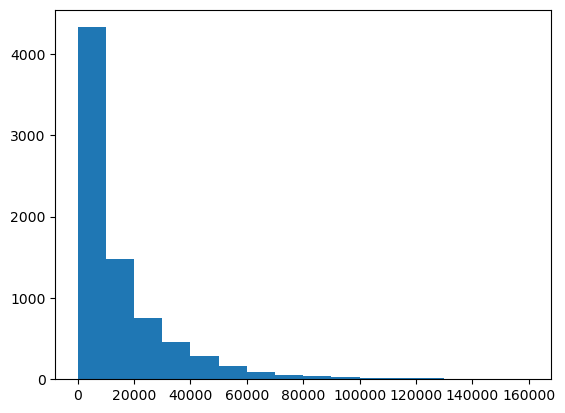

In [21]:
plt.hist(GDP_Per_Capita_series, bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000])
# plt.hist(gdp_2021['GDP_Per_Capita'], np.arrange(0,170000,10000)); 

(array([[7.728e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [7.728e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [4.326e+03, 1.479e+03, 7.550e+02, 4.620e+02, 2.900e+02, 1.620e+02,
         9.300e+01, 5.500e+01, 3.900e+01, 2.400e+01, 1.100e+01, 1.200e+01,
         1.000e+01, 2.000e+00, 5.000e+00, 2.000e+00]]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000., 110000., 120000., 130000.,
        140000., 150000., 160000.]),
 <a list of 3 BarContainer objects>)

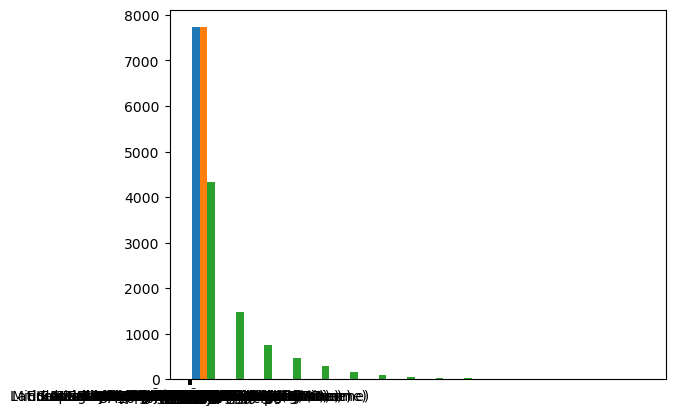

In [22]:
plt.hist(gdp_df, bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000])


(array([88., 61., 26., 18., 15., 15.,  7.,  5.,  2.,  0.,  2.,  1.,  0.,
         1.,  0.,  0.]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000., 110000., 120000., 130000.,
        140000., 150000., 160000.]),
 <BarContainer object of 16 artists>)

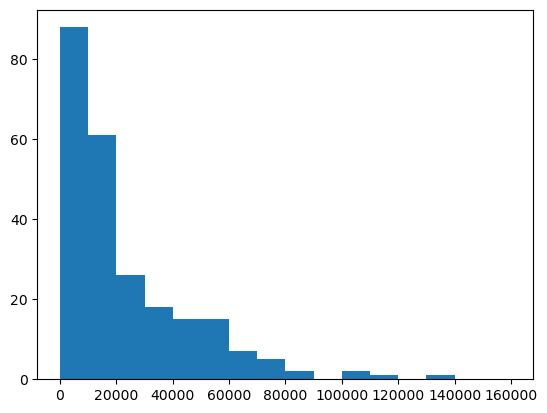

In [23]:
plt.hist(GDP_Per_Capita_2021_series, bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000])

(array([[241.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.],
        [241.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.],
        [ 88.,  61.,  26.,  18.,  15.,  15.,   7.,   5.,   2.,   0.,   2.,
           1.,   0.,   1.,   0.,   0.]]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000., 110000., 120000., 130000.,
        140000., 150000., 160000.]),
 <a list of 3 BarContainer objects>)

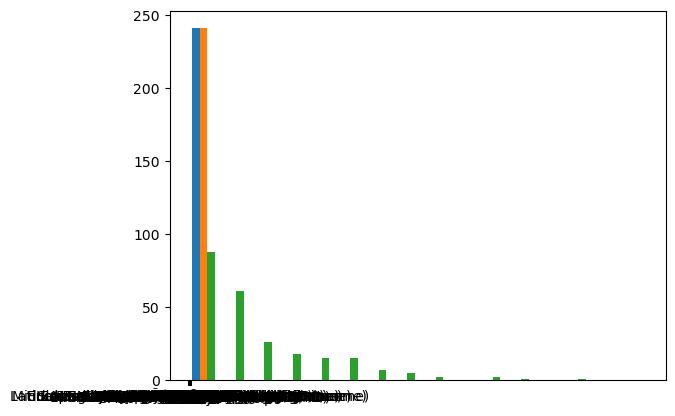

In [24]:
plt.hist(gdp_2021, bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000])

### Q11 Ans: right skewed

## Q12 steps:

In [25]:
gdp_2021 = gdp_df[gdp_df['Year']==2021] 
gdp_2021_SortedBy_GDP_Per_Capita = gdp_2021.sort_values('GDP_Per_Capita')
gdp_2021_SortedBy_GDP_Per_Capita

,Country,Year,GDP_Per_Capita
972,Burundi,2021,787.942779
1216,Central African Republic,2021,924.151424
1629,Dem. Rep. Congo,2021,1184.720486
6285,Somalia,2021,1254.340664
5089,Niger,2021,1309.337926
...,...,...,...
680,Bermuda,2021,86699.251991
5761,Qatar,2021,102469.967574
3297,Ireland,2021,106570.398435
6123,Singapore,2021,118887.822066


### Q12a Ans: Countries with the 5 lowest GDP Per Capita: Burundi, Central African Republic (CAR), DRC, Somalia, Niger

In [26]:
gdp_2021_SortedBy_GDP_Per_Capita.head(5)

,Country,Year,GDP_Per_Capita
972,Burundi,2021,787.942779
1216,Central African Republic,2021,924.151424
1629,Dem. Rep. Congo,2021,1184.720486
6285,Somalia,2021,1254.340664
5089,Niger,2021,1309.337926


### Q12b Ans: Countries with the 5 highest GDP Per Capita: Bermuda, Qatar, Ireland, Singapore, Luxembourg

In [27]:
gdp_2021_SortedBy_GDP_Per_Capita.tail(5)

,Country,Year,GDP_Per_Capita
680,Bermuda,2021,86699.251991
5761,Qatar,2021,102469.967574
3297,Ireland,2021,106570.398435
6123,Singapore,2021,118887.822066
4166,Luxembourg,2021,131511.020155


## Q13 steps:

In [28]:
gdp_df_1990_2022 = gdp_df[(gdp_df['Year']==1990) | (gdp_df['Year']==2022)] 
gdp_df_1990_2022

,Country,Year,GDP_Per_Capita
20,Africa Eastern and Southern,2022,4169.019532
52,Africa Eastern and Southern,1990,1815.978712
53,Africa Western and Central,2022,4798.434519
85,Africa Western and Central,1990,1748.455212
86,Albania,2022,18551.716479
...,...,...,...
7661,Yemen,1990,1809.109912
7662,Zambia,2022,3894.310259
7694,Zambia,1990,1541.301115
7695,Zimbabwe,2022,2530.645987


In [29]:

gdp_df_1990_2022_pivoted = pd.pivot_table(gdp_df_1990_2022, values='GDP_Per_Capita', index=['Country'], columns=['Year'], dropna = True)
gdp_df_1990_2022_pivoted

Year,1990,2022
Country,,
Africa Eastern and Southern,1815.978712,4169.019532
Africa Western and Central,1748.455212,4798.434519
Albania,2549.746801,18551.716479
Algeria,6974.076379,13209.596769
Angola,3283.170843,6973.696299
...,...,...
West Bank and Gaza,NaN,6756.783285
World,5559.008116,20645.483563
Yemen,1809.109912,NaN


In [30]:
gdp_df_1990_2022_pivoted_no_NA =  gdp_df_1990_2022_pivoted.dropna()

gdp_pivoted = gdp_df_1990_2022_pivoted_no_NA
gdp_pivoted

Year,1990,2022
Country,,
Africa Eastern and Southern,1815.978712,4169.019532
Africa Western and Central,1748.455212,4798.434519
Albania,2549.746801,18551.716479
Algeria,6974.076379,13209.596769
Angola,3283.170843,6973.696299
...,...,...
Vanuatu,1638.265182,3289.479668
Viet Nam,1184.121960,13456.551425
World,5559.008116,20645.483563


## Q14 steps:

In [31]:
gdp_pivoted.columns


Index([1990, 2022], dtype='int64', name='Year')

In [32]:
gdp_df.head

<bound method NDFrame.head of           Country  Year  GDP_Per_Capita
0     Afghanistan  2021     1673.964059
1     Afghanistan  2020     2078.595086
2     Afghanistan  2019     2168.133765
3     Afghanistan  2018     2110.239384
4     Afghanistan  2017     2096.093111
...           ...   ...             ...
7723     Zimbabwe  1994     1958.125362
7724     Zimbabwe  1993     1765.451299
7725     Zimbabwe  1992     1731.232787
7726     Zimbabwe  1991     1907.652489
7727     Zimbabwe  1990     1794.153646

[7728 rows x 3 columns]>

In [33]:
gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2022] - gdp_pivoted[1990])/(gdp_pivoted[1990]) 

/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gn/T/ipykernel_26701/1923102691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2022] - gdp_pivoted[1990])/(gdp_pivoted[1990])


In [34]:
gdp_pivoted

Year,1990,2022,Percent_Change
Country,,,
Africa Eastern and Southern,1815.978712,4169.019532,129.574251
Africa Western and Central,1748.455212,4798.434519,174.438515
Albania,2549.746801,18551.716479,627.590539
Algeria,6974.076379,13209.596769,89.409981
Angola,3283.170843,6973.696299,112.407354
...,...,...,...
Vanuatu,1638.265182,3289.479668,100.790428
Viet Nam,1184.121960,13456.551425,1036.416001
World,5559.008116,20645.483563,271.387901


In [35]:
gdp_pivoted_SortedBy_Percent_Change = gdp_pivoted.sort_values('Percent_Change')
gdp_pivoted_SortedBy_Percent_Change.head(20)

Year,1990,2022,Percent_Change
Country,,,
United Arab Emirates,83843.224678,87729.191264,4.634801
Congo,3429.411702,3790.711307,10.535323
Brunei,55168.250883,69274.984141,25.570383
Burundi,609.371648,836.187569,37.221279
Gabon,11959.511499,16470.583535,37.719534
Zimbabwe,1794.153646,2530.645987,41.049569
Madagascar,1182.673482,1774.068709,50.004945
Haiti,2179.485152,3305.075955,51.644803
Central African Republic,634.177324,967.268324,52.523322


In [36]:
Countries_GDPperCap_Neg_Changes = gdp_pivoted_SortedBy_Percent_Change[(gdp_pivoted_SortedBy_Percent_Change['Percent_Change']<0)]
Countries_GDPperCap_Neg_Changes

Year,1990,2022,Percent_Change
Country,,,


### Q15 Ans: 0 countries and regions in the world have experienced a decrease in their GDP Per Capita

In [37]:
len(Countries_GDPperCap_Neg_Changes)

0

## Q16 steps:

In [40]:
gdp_pivoted_SortedBy_Percent_Change = gdp_pivoted.sort_values('Percent_Change')
gdp_pivoted_SortedBy_Percent_Change.tail(2)

Year,1990,2022,Percent_Change
Country,,,
China,981.419207,21475.610527,2088.219913
Equatorial Guinea,588.162695,17396.017970,2857.688090


### Q16 Ans: Equatorial Guinea has the highest % change in GDP per capita. China has the 2nd highest % change in GDP per capita.

In [42]:
TwoLines_forLargest_Changes = gdp_pivoted_SortedBy_Percent_Change.tail(2)

# axes = plt.gca()

# year_series = gdp_df['Year'].squeeze()
# country_series = gdp_df['Country'].squeeze()

# lines_plot = {'x' : year_series,
         #    'y' : country_series}
# lines_plot.show()

gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1673.964059
1,Afghanistan,2020,2078.595086
2,Afghanistan,2019,2168.133765
3,Afghanistan,2018,2110.239384
4,Afghanistan,2017,2096.093111
...,...,...,...
7723,Zimbabwe,1994,1958.125362
7724,Zimbabwe,1993,1765.451299
7725,Zimbabwe,1992,1731.232787
7726,Zimbabwe,1991,1907.652489


<Axes: xlabel='Year'>

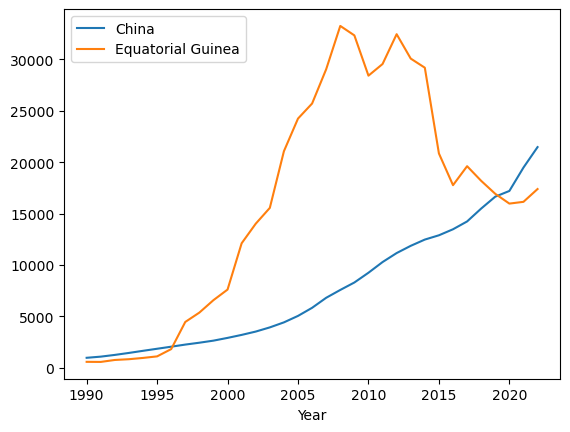

In [43]:

##                                  ==
axis = gdp_df.loc[gdp_df['Country'].isin(['China'])].plot(kind='line', x='Year', y='GDP_Per_Capita', label = 'China')
##                            ==
gdp_df.loc[gdp_df['Country'].isin(['Equatorial Guinea'])].plot(kind='line', x='Year', y='GDP_Per_Capita', ax = axis, label = 'Equatorial Guinea')

## Q17 step:

In [44]:
continents = pd.read_csv("/Users/bentonwang/My_Documents/NSS_DS8_Projects/un-exploration-MultidisciplinaryDeepDives/data/continents.csv")

## Q18 steps:


Side Note: here I am using the variable name *gdp_df_joined* instead of *gdp_df*

In [46]:
gdp_df_joined = gdp_df.merge(continents, on='Country', how='inner')
gdp_df_joined

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2021,1673.964059,Asia
1,Afghanistan,2020,2078.595086,Asia
2,Afghanistan,2019,2168.133765,Asia
3,Afghanistan,2018,2110.239384,Asia
4,Afghanistan,2017,2096.093111,Asia
...,...,...,...,...
5957,Zimbabwe,1994,1958.125362,Africa
5958,Zimbabwe,1993,1765.451299,Africa
5959,Zimbabwe,1992,1731.232787,Africa
5960,Zimbabwe,1991,1907.652489,Africa


In [47]:
countries_per_continent = gdp_df_joined.groupby('Continent')['Country'].nunique()
countries_per_continent

Continent
Africa           52
Asia             42
Europe           44
North America    26
Oceania          14
South America    12
Name: Country, dtype: int64

## Q19 steps:

<Axes: xlabel='Continent'>

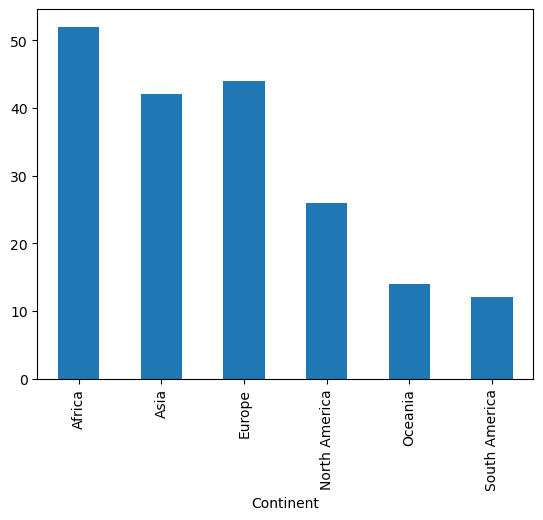

In [48]:
countries_per_continent.plot.bar()

In [ ]:
# if there are duplicates, then use the following functions: 

# merged_gdp_cont = gdp_df.drop_duplicates(subset = 'Country')['Continent'].value_counts()
# merged_gdp_cont.plot(kind='bar')

# plt.xlabel('Continent Name')
# plt.ylabel('Number of Continents')
# plt.title('Countries per Continents')

## Q20 steps ~ Boxplot construction

In [50]:
gdp_df_joined

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2021,1673.964059,Asia
1,Afghanistan,2020,2078.595086,Asia
2,Afghanistan,2019,2168.133765,Asia
3,Afghanistan,2018,2110.239384,Asia
4,Afghanistan,2017,2096.093111,Asia
...,...,...,...,...
5957,Zimbabwe,1994,1958.125362,Africa
5958,Zimbabwe,1993,1765.451299,Africa
5959,Zimbabwe,1992,1731.232787,Africa
5960,Zimbabwe,1991,1907.652489,Africa


In [49]:
gdp_df_joined_GroupBy_Continent = gdp_df_joined.groupby('Continent')
gdp_df_joined_GroupBy_Continent

<Axes: xlabel='Continent', ylabel='GDP_Per_Capita'>

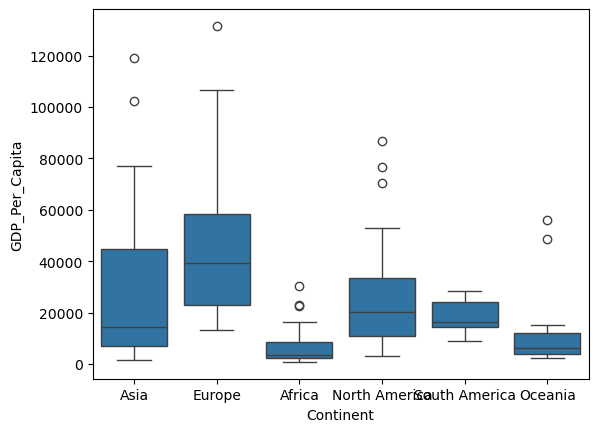

In [51]:
sns.boxplot(data = gdp_df_joined.loc[gdp_df_joined['Year']==2021], x='Continent', y='GDP_Per_Capita')


# gdp_df_joined.loc[gdp_df_joined['Year']==2018].plot(kind='box', x='Continent', y='GDP_Per_Capita')


## Q21 steps:

In [60]:
life_expectancy = pd.read_csv("/Users/bentonwang/My_Documents/NSS_DS8_Projects/un-exploration-MultidisciplinaryDeepDives/data/life_expectancy_WorldBank.csv", skiprows=4)

In [61]:
life_expectancy.head(20)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,...,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,74.992000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,...,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,62.899031,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,...,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,62.879000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,...,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,57.626176,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,...,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,61.929000,NaN,NaN
5,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,54.439000,55.634000,56.671000,57.844000,58.983000,60.019000,...,78.644000,78.860000,79.047000,79.184000,79.282000,76.989000,76.463000,76.833000,NaN,NaN
6,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.972899,45.676401,46.122576,46.972472,47.895758,48.232107,...,70.758222,70.943062,71.429596,71.633017,71.844626,70.923360,70.814483,71.227274,NaN,NaN
8,United Arab Emirates,ARE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,48.811000,49.695000,50.686000,51.584000,52.848000,53.985000,...,79.223000,79.335000,79.504000,79.627000,79.726000,78.946000,78.710000,79.196000,NaN,NaN
9,Argentina,ARG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,63.978000,64.360000,64.244000,64.449000,64.363000,64.593000,...,76.760000,76.308000,76.833000,76.999000,77.284000,75.892000,75.390000,76.064000,NaN,NaN


## Q22 Steps:

In [63]:
# life_expectancy_after_column_drop = life_expectancy.drop(life_expectancy.iloc[:, 1:4], inplace=False, axis=1)

life_expectancy_after_column_drop = life_expectancy.drop(['Country Code', 'Indicator Name' , 'Indicator Code', '2023', 'Unnamed: 68'], inplace=False, axis=1)
life_expectancy_after_column_drop

#life_expectancy_after_column_drop.index

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,66.063000,66.439000,66.757000,...,75.636000,75.601000,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,74.992000
1,Africa Eastern and Southern,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,45.249105,45.924905,46.223097,...,60.709870,61.337917,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,62.899031
2,Afghanistan,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,35.453000,35.924000,36.418000,...,62.417000,62.545000,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,62.879000
3,Africa Western and Central,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,39.837827,39.471500,40.085679,...,55.673406,55.922229,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,57.626176
4,Angola,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,38.757000,39.092000,39.484000,...,59.307000,60.040000,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,61.929000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,61.485000,61.836000,62.134000,62.440000,62.734000,63.041000,63.323000,63.653000,63.935000,...,78.587000,78.880000,78.922000,78.981000,78.783000,78.696000,79.022000,76.567000,76.806000,79.524000
262,"Yemen, Rep.",33.678000,34.098000,33.615000,33.247000,34.738000,35.373000,36.097000,36.866000,37.796000,...,67.545000,67.384000,65.873000,66.064000,65.957000,64.575000,65.092000,64.650000,63.753000,63.720000
263,South Africa,52.669000,53.085000,53.376000,53.633000,53.906000,54.192000,54.391000,54.626000,54.876000,...,62.533000,63.380000,63.950000,64.747000,65.402000,65.674000,66.175000,65.252000,62.341000,61.480000
264,Zambia,49.042000,49.452000,49.794000,50.133000,49.849000,50.563000,50.679000,50.802000,50.856000,...,59.878000,60.699000,61.208000,61.794000,62.120000,62.342000,62.793000,62.380000,61.223000,61.803000


In [64]:
type(life_expectancy_after_column_drop)

pandas.core.frame.DataFrame

pd.melt() function unpivots a data table

In [65]:
life_expectancy_after_melt = pd.melt(life_expectancy_after_column_drop, id_vars=['Country Name'])
life_expectancy_after_melt 
 

,Country Name,variable,value
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
16753,Kosovo,2022,79.524000
16754,"Yemen, Rep.",2022,63.720000
16755,South Africa,2022,61.480000
16756,Zambia,2022,61.803000


In [66]:
life_expectancy_after_melt_rename = life_expectancy_after_melt.rename(columns = {"Country Name": "Country", "variable": "Year", "value": "Life_Expectancy"})
life_expectancy_after_melt_rename

,Country,Year,Life_Expectancy
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
16753,Kosovo,2022,79.524000
16754,"Yemen, Rep.",2022,63.720000
16755,South Africa,2022,61.480000
16756,Zambia,2022,61.803000


### Q23 Ans:  Japan is the first country with a life expectancy to exceed 80 (in 1996)

In [67]:
life_expectancy_above80_cutoff = life_expectancy_after_melt_rename.loc[life_expectancy_after_melt_rename['Life_Expectancy']>80]
life_expectancy_above80_cutoff

,Country,Year,Life_Expectancy
9695,Japan,1996,80.219756
9926,Gibraltar,1997,80.343000
9938,"Hong Kong SAR, China",1997,80.112195
9961,Japan,1997,80.424146
9988,"Macao SAR, China",1997,80.162000
...,...,...,...
16692,Qatar,2022,81.559000
16700,Singapore,2022,82.895122
16714,Slovenia,2022,81.282927
16715,Sweden,2022,83.109756


In [68]:
life_expectancy_above80_cutoff_sorted = life_expectancy_above80_cutoff.groupby(['Year'])    #['Country'].count().reset_index(name='Count').sort_values(['Count'], ascending=True)
life_expectancy_above80_cutoff_sorted.head(10)

,Country,Year,Life_Expectancy
9695,Japan,1996,80.219756
9926,Gibraltar,1997,80.343000
9938,"Hong Kong SAR, China",1997,80.112195
9961,Japan,1997,80.424146
9988,"Macao SAR, China",1997,80.162000
...,...,...,...
16529,Switzerland,2022,83.453659
16530,Channel Islands,2022,81.583000
16545,Cyprus,2022,81.889000
16547,Germany,2022,80.705610


## Q24 steps:

In [69]:
gdp_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728 entries, 0 to 7727
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7728 non-null   object 
 1   Year            7728 non-null   int64  
 2   GDP_Per_Capita  7728 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 181.3+ KB


In [70]:
life_expectancy_above80_cutoff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 9695 to 16748
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          690 non-null    object 
 1   Year             690 non-null    object 
 2   Life_Expectancy  690 non-null    float64
dtypes: float64(1), object(2)
memory usage: 21.6+ KB


In [71]:
life_expectancy_above80_cutoff['Year'] = pd.to_numeric(life_expectancy_above80_cutoff['Year'])
life_expectancy_above80_cutoff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 9695 to 16748
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          690 non-null    object 
 1   Year             690 non-null    int64  
 2   Life_Expectancy  690 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 21.6+ KB


/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gn/T/ipykernel_26701/3445038843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_expectancy_above80_cutoff['Year'] = pd.to_numeric(life_expectancy_above80_cutoff['Year'])


In [72]:
gdp_le = gdp_df.merge(life_expectancy_above80_cutoff, on=['Country','Year'], how='outer')
gdp_le.head(5)

,Country,Year,GDP_Per_Capita,Life_Expectancy
0,Afghanistan,2002,943.116265,NaN
1,Afghanistan,2003,970.645115,NaN
2,Afghanistan,2004,971.811023,NaN
3,Afghanistan,2005,1075.671373,NaN
4,Afghanistan,2006,1120.893128,NaN


Cautionary Note: If both key columns contain rows where the key is a null value, those rows will be matched against each other. This is different from usual SQL join behaviour and can lead to unexpected results.

In [73]:
gdp_le.tail(5)

,Country,Year,GDP_Per_Capita,Life_Expectancy
7845,Zimbabwe,2018,2457.309859,NaN
7846,Zimbabwe,2019,2296.845429,NaN
7847,Zimbabwe,2020,2101.804597,NaN
7848,Zimbabwe,2021,2333.973632,NaN
7849,Zimbabwe,2022,2530.645987,NaN


### Q25 Ans: 40 countries and regions/jurisdictions have a life expectancy of at least 80 in 2021

In [74]:
gdp_le_2021_Above80 = gdp_le.loc[((gdp_le['Year']==2021) & (gdp_le['Life_Expectancy']>80))]
gdp_le_2021_Above80

,Country,Year,GDP_Per_Capita,Life_Expectancy
380,Australia,2021,55947.052228,83.300000
413,Austria,2021,59962.827052,81.190244
611,Belgium,2021,58840.702275,81.790244
1131,Canada,2021,53023.420556,81.587073
1181,Cayman Islands,2021,76580.735647,82.009756
1298,Channel Islands,2021,NaN,81.232000
1579,Cyprus,2021,44405.007812,81.203000
1711,Denmark,2021,64883.902034,81.404878
2198,Euro area,2021,51356.783084,81.594947
2330,European Union,2021,49024.399472,80.316613


In [75]:
len(gdp_le_2021_Above80)

40

In [76]:
gdp_le_2021_Above80.describe()

,Year,GDP_Per_Capita,Life_Expectancy
count,40.0,33.000000,40.000000
mean,2021.0,60119.835538,82.164606
std,0.0,22503.038822,1.413331
min,2021.0,31294.800289,80.068293
25%,2021.0,46705.017906,81.199811
50%,2021.0,54706.445975,82.108537
75%,2021.0,64883.902034,83.114024
max,2021.0,131511.020155,85.532683


In [78]:
type(gdp_le_2021_Above80)

pandas.core.frame.DataFrame

In [79]:
No_of_Countries_LE_Above_80 = gdp_le_2021_Above80.groupby('Country')['Country'].nunique()
No_of_Countries_LE_Above_80

Country
Australia                   1
Austria                     1
Belgium                     1
Canada                      1
Cayman Islands              1
Channel Islands             1
Cyprus                      1
Denmark                     1
Euro area                   1
European Union              1
Faroe Islands               1
Finland                     1
France                      1
Germany                     1
Greece                      1
Hong Kong SAR, China        1
Iceland                     1
Ireland                     1
Isle of Man                 1
Israel                      1
Italy                       1
Japan                       1
Korea, Rep.                 1
Liechtenstein               1
Luxembourg                  1
Macao SAR, China            1
Malta                       1
Netherlands                 1
New Zealand                 1
Norway                      1
Portugal                    1
Puerto Rico                 1
Singapore                   1
Sl

In [80]:
Count_No_of_Countries_LE_Above_80 = pd.value_counts(No_of_Countries_LE_Above_80)
Count_No_of_Countries_LE_Above_80

/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gn/T/ipykernel_26701/642024390.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  Count_No_of_Countries_LE_Above_80 = pd.value_counts(No_of_Countries_LE_Above_80)


Country
1    40
Name: count, dtype: int64

## Q26 Steps:

In [81]:
gdp_le_2021 = gdp_le.loc[(gdp_le['Year']==2021)]
gdp_le_2021

,Country,Year,GDP_Per_Capita,Life_Expectancy
19,Afghanistan,2021,1673.964059,NaN
51,Africa Eastern and Southern,2021,3858.004651,NaN
84,Africa Western and Central,2021,4429.952133,NaN
117,Albania,2021,15532.706056,NaN
150,Algeria,2021,12170.193777,NaN
...,...,...,...,...
7696,Virgin Islands (U.S.),2021,NaN,80.068293
7725,West Bank and Gaza,2021,6224.656776,NaN
7758,World,2021,18780.780368,NaN
7815,Zambia,2021,3571.661386,NaN


In [82]:
gdp_le_2021_top = gdp_le_2021.sort_values(by='GDP_Per_Capita', ascending=False)
gdp_le_2021_top

,Country,Year,GDP_Per_Capita,Life_Expectancy
4308,Luxembourg,2021,131511.020155,82.597561
6247,Singapore,2021,118887.822066,83.092683
3399,Ireland,2021,106570.398435,82.353659
5897,Qatar,2021,102469.967574,NaN
710,Bermuda,2021,86699.251991,NaN
...,...,...,...,...
3407,Isle of Man,2021,NaN,80.525000
3712,"Korea, Rep.",2021,NaN,83.526829
4148,Liechtenstein,2021,NaN,84.402439
6629,St. Martin (French part),2021,NaN,80.379000


In [83]:
gdp_le_2021_top3 = gdp_le_2021_top.head(3)
gdp_le_2021_top3

,Country,Year,GDP_Per_Capita,Life_Expectancy
4308,Luxembourg,2021,131511.020155,82.597561
6247,Singapore,2021,118887.822066,83.092683
3399,Ireland,2021,106570.398435,82.353659


In [84]:
# gdp_le_2019_top3 = sns.load_dataset("gdp_le_2019_top3")

Top_3_Countries = list(set(gdp_le_2021_top3["Country"]))  #list(set(df['a'])
Top_3_Countries

['Singapore', 'Ireland', 'Luxembourg']

Convert to list

In [85]:
gdp_le_top3 = gdp_le.loc[gdp_le['Country'].isin(Top_3_Countries)]  #.plot(kind='line', x='Year', y='GDP_Per_Capita', ax = axis, label = 'Equatorial Guinea')
# since Top_3_Countries already is a list, no [] is needed around it

gdp_le_top3 

,Country,Year,GDP_Per_Capita,Life_Expectancy
3368,Ireland,1990,13743.542119,NaN
3369,Ireland,1991,14399.454192,NaN
3370,Ireland,1992,15116.509870,NaN
3371,Ireland,1993,15812.263331,NaN
3372,Ireland,1994,17012.295665,NaN
...,...,...,...,...
6244,Singapore,2018,100642.752176,83.297561
6245,Singapore,2019,102630.933142,83.595122
6246,Singapore,2020,100226.368465,83.543902
6247,Singapore,2021,118887.822066,83.092683


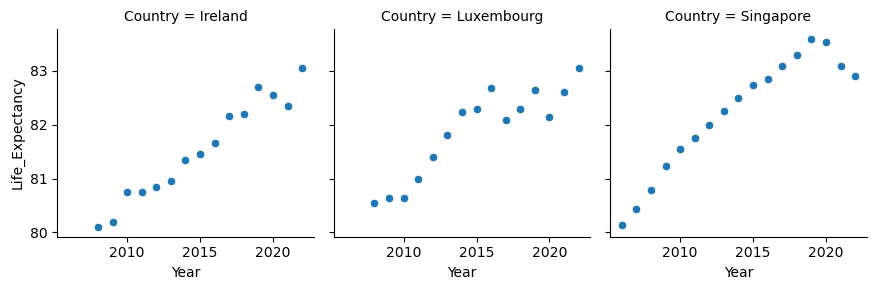

In [86]:
g = sns.FacetGrid(gdp_le_top3, col = "Country")  # col = gdp_le_2019_top3[["Country"]])
g.map_dataframe(sns.scatterplot, x="Year", y="Life_Expectancy")

## Q27 steps:

Observation: Positive correlation; The modicum of overdispersion that we see here might be due each countries epidemiological response during the pandemic (?) 

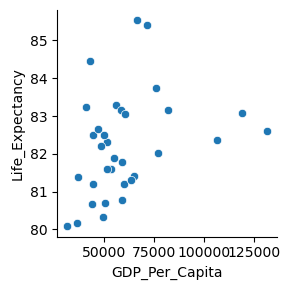

In [87]:
g = sns.FacetGrid(gdp_le_2021)         # col = gdp_le_2021_top3[["Country"]])
g.map_dataframe(sns.scatterplot, x="GDP_Per_Capita", y="Life_Expectancy")

### Q28 Steps: 

<Axes: xlabel='GDP_Per_Capita', ylabel='Life_Expectancy'>

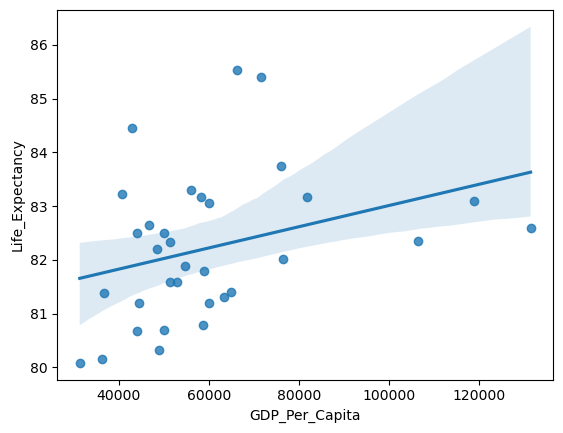

In [88]:
sns.regplot(x="GDP_Per_Capita", y="Life_Expectancy", data = gdp_le_2021)

In [89]:
gdp_le_2021['GDP_Per_Capita'].corr(gdp_le_2021['Life_Expectancy'])

0.3269994744096429

In [90]:
gdp_le_2021['Life_Expectancy'].corr(gdp_le_2021['GDP_Per_Capita'])

0.3269994744096429

### Q28 Ans:

 r = 0.3269994744096429  Life Expectancy and GDP Per Capita moderately correlate with each other.

Last year's data analysis that looks at years leading up to 2018 has an r value of 0.423027349892522

## Q29 Steps:

In [91]:
gdp_le_2021['Log_of_GDP_Per_Capita'] = np.log(gdp_le_2021.GDP_Per_Capita)
gdp_le_2021

/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gn/T/ipykernel_26701/653033398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2021['Log_of_GDP_Per_Capita'] = np.log(gdp_le_2021.GDP_Per_Capita)


,Country,Year,GDP_Per_Capita,Life_Expectancy,Log_of_GDP_Per_Capita
19,Afghanistan,2021,1673.964059,NaN,7.422950
51,Africa Eastern and Southern,2021,3858.004651,NaN,8.257905
84,Africa Western and Central,2021,4429.952133,NaN,8.396144
117,Albania,2021,15532.706056,NaN,9.650703
150,Algeria,2021,12170.193777,NaN,9.406745
...,...,...,...,...,...
7696,Virgin Islands (U.S.),2021,NaN,80.068293,NaN
7725,West Bank and Gaza,2021,6224.656776,NaN,8.736274
7758,World,2021,18780.780368,NaN,9.840589
7815,Zambia,2021,3571.661386,NaN,8.180786


In [92]:
gdp_le_2021['Log_of_GDP_Per_Capita'].corr(gdp_le_2021['Life_Expectancy'])

0.38344138524171517

<Axes: xlabel='Log_of_GDP_Per_Capita', ylabel='Life_Expectancy'>

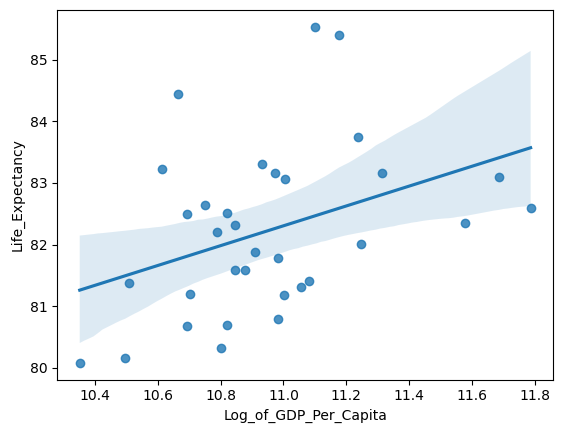

In [93]:
sns.regplot(x="Log_of_GDP_Per_Capita", y="Life_Expectancy", data = gdp_le_2021)

### Q29 Ans: 

Performing a logrithmic function on the independent variable (GDP Per Capita) has increased the value of r by a little bit. Makes mathematical sense.